Multiple Regression Equation:

y = b0 + b1*x1 + b2*x2 +b3*x3 +..... 

y         -> Dependent Variable

x1,x2,x3  -> Independent Variable

b0        -> Intercept/Constant

b1,b2,b3  -> Slope/Coefficient

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r'./csv/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
X=df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
y=df['Performance Index']

In [4]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [5]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [6]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=3)

In [7]:
X_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
5876,8,79,8,6
6555,6,73,7,1
1448,1,42,5,6
3351,6,43,4,3
231,8,93,9,7
...,...,...,...,...
869,6,76,6,4
2928,7,98,6,9
8436,1,51,9,5
6312,5,78,6,1


In [8]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
pred = lr.predict([[7,99,9,1],[7,74,8,1]])
pred

c:\Users\Kshitij\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.53780556, 65.59170041])

c:\Users\Kshitij\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


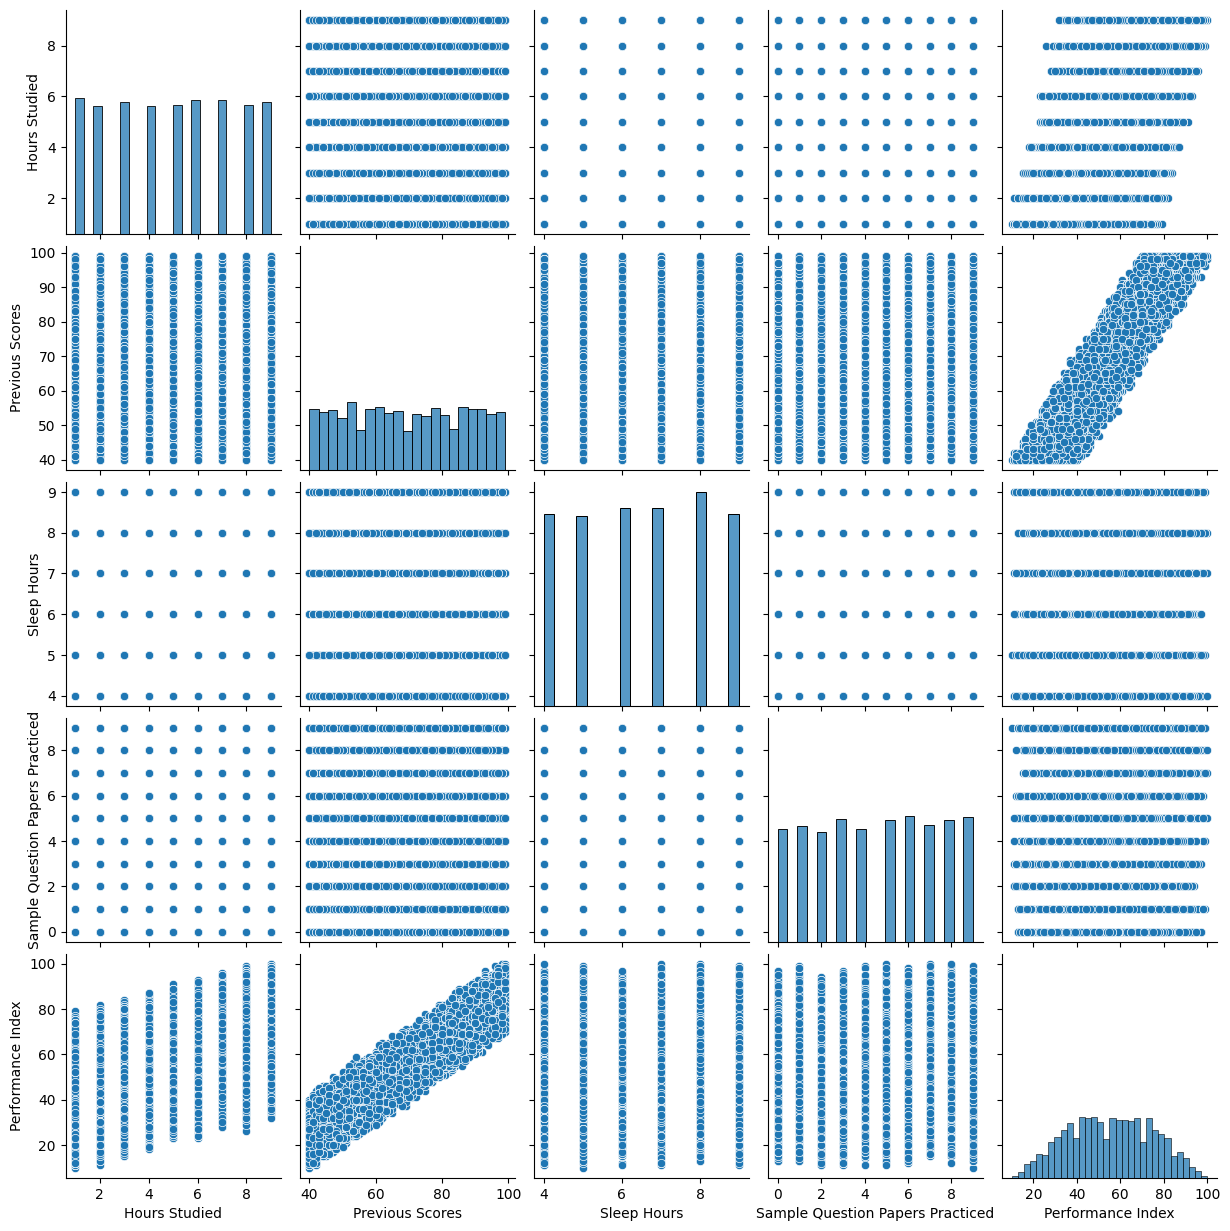

In [10]:
# We can't visualize in more than 3D so, we use pairplot
data = pd.concat([X, y], axis=1)
sns.pairplot(data)

c:\Users\Kshitij\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Performance')

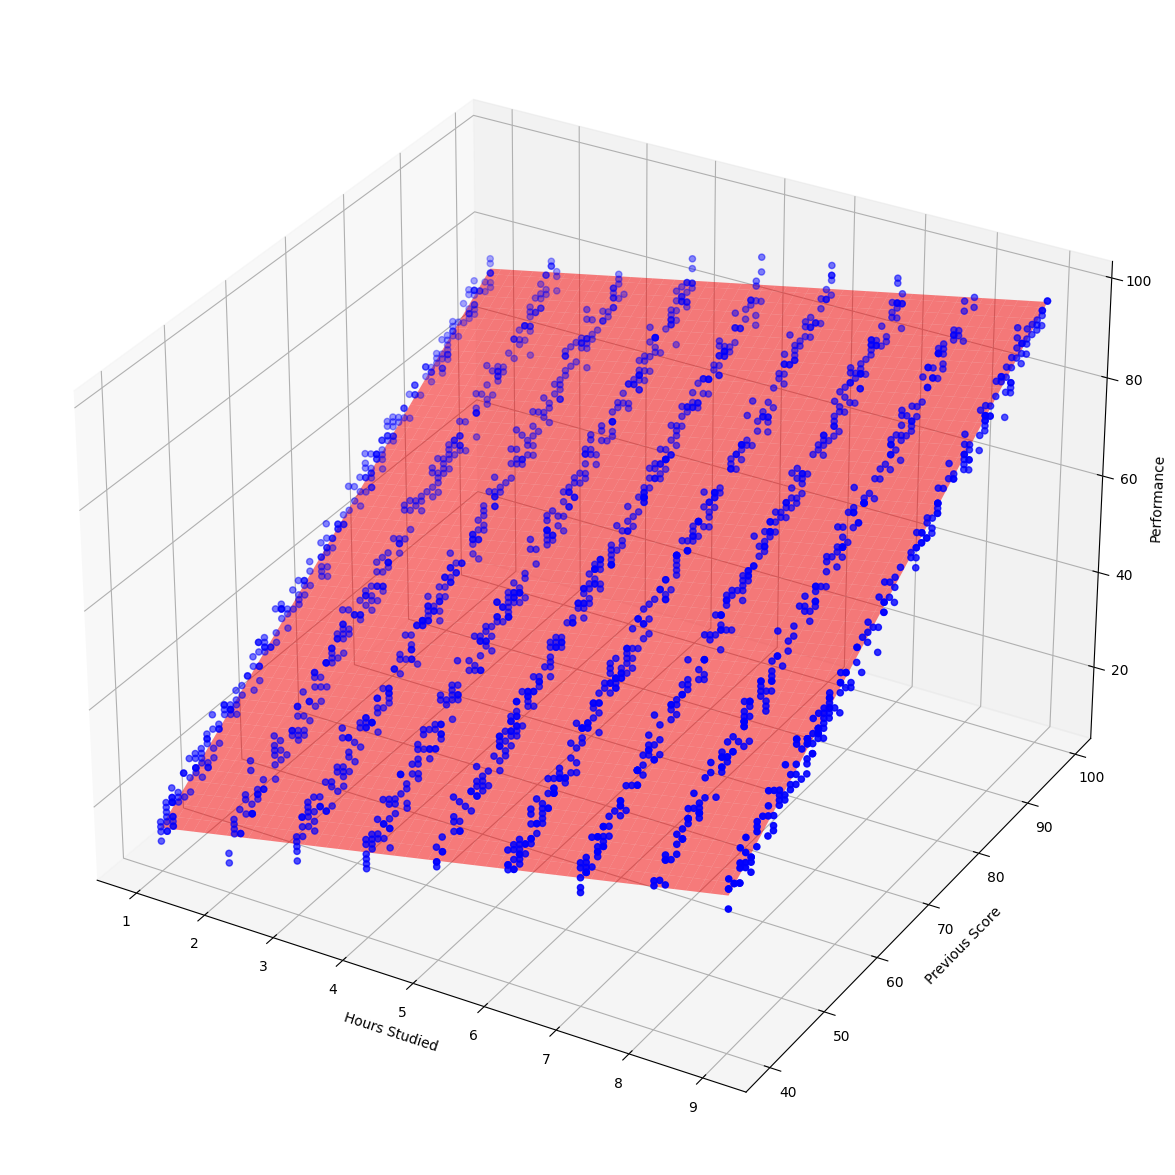

In [11]:
# say i use only 3 features
# I.V. -> Hour Studied , Perviours Scores
# D.V. -> Performance Index
# ploting a 3D graph by using these.

import numpy as np
X1=X_test.iloc[:,0:1]
X2=X_test.iloc[:,1:2]
y=y_test

X1_range = np.linspace(min(X1.values), max(X1.values), 100)
X2_range = np.linspace(min(X2.values), max(X2.values), 100)
X1_values, X2_values = np.meshgrid(X1_range, X2_range)

# Create an array of feature vectors for prediction
X_pred = np.c_[X1_values.ravel(), X2_values.ravel()]

lr2=LinearRegression()
lr2.fit(X_train.iloc[:,0:2],y_train)

# Predict y values for the meshgrid
y_pred = lr2.predict(X_pred)
y_pred = y_pred.reshape(X1_values.shape)

# Create a 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(X1, X2, y, c='blue', marker='o')

ax.plot_surface(X1_values, X2_values, y_pred, color='r', alpha=0.5)

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Score')
ax.set_zlabel('Performance')


In [12]:
import plotly.graph_objects as go
scatter = go.Scatter3d(
    x=X1.values.ravel(),
    y=X2.values.ravel(),
    z=y.ravel(),
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Create the surface plot for the regression model
surface = go.Surface(
    x=X1_values,
    y=X2_values,
    z=y_pred,
    colorscale='RdBu',
    opacity=0.8,
    name='Regression Model'
)

fig = go.Figure(data=[scatter, surface])

fig.update_layout(scene=dict(xaxis_title='Hours Studied', yaxis_title='Previous Score', zaxis_title='Performance'))


In [13]:
#slope
lr.coef_

array([2.85616815, 1.0188665 , 0.47444275, 0.19708591])

In [14]:
#intercept
lr.intercept_

-33.790225212584005

In [15]:
lr.score(X_test,y_test)

0.9882739534139325